In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LinearRegression, LogisticRegression



df = pd.read_csv('MH_encoded.csv')
df.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,...,Work_Location_Onsite,Work_Location_Remote,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression,Mental_Health_Condition_None,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,13,47,7,2,1.0,0,0.0,1,0.0,...,False,False,False,True,False,False,True,False,False,False
1,40,3,52,4,1,1.0,0,2.0,3,2.0,...,False,True,False,False,False,True,False,False,False,False
2,59,22,46,11,5,1.0,0,1.0,4,0.0,...,False,False,False,False,False,False,False,True,False,False
3,27,20,32,8,4,2.0,1,2.0,3,0.0,...,True,False,False,True,False,False,True,False,False,False
4,49,32,35,12,2,2.0,1,0.0,3,0.0,...,True,False,False,False,True,False,False,True,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 4629 non-null   int64  
 1   Years_of_Experience                 4629 non-null   int64  
 2   Hours_Worked_Per_Week               4629 non-null   int64  
 3   Number_of_Virtual_Meetings          4629 non-null   int64  
 4   Work_Life_Balance_Rating            4629 non-null   int64  
 5   Stress_Level                        4629 non-null   float64
 6   Access_to_Mental_Health_Resources   4629 non-null   int64  
 7   Productivity_Change                 4629 non-null   float64
 8   Social_Isolation_Rating             4629 non-null   int64  
 9   Satisfaction_with_Remote_Work       4629 non-null   float64
 10  Company_Support_for_Remote_Work     4629 non-null   int64  
 11  Physical_Activity                   4629 no

In [28]:
from sklearn.preprocessing import StandardScaler

# Define the numeric features to be standardized
numeric_features = [
    'Age',
    'Years_of_Experience',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Stress_Level',
    'Social_Isolation_Rating',
    'Company_Support_for_Remote_Work'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [29]:
x = df.drop(['Satisfaction_with_Remote_Work'], axis=1)
y = df['Satisfaction_with_Remote_Work']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=23)

In [30]:
x_train, y_train = x_train.dropna(), y_train.dropna()



numerical_features = x.columns


numeric_transformer = StandardScaler()

In [31]:
preProcess = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features)])

pipeline = Pipeline([
    ('preprocess', preProcess),
    ('regressor', RandomForestRegressor())
])

print(preProcess.fit_transform(x_train))

param_grid = [{'regressor': [RandomForestRegressor()],
               'regressor__max_depth': [1, 2, 3, 4],
              'regressor__n_estimators': [100, 500]}]

[[ 0.07722583  1.26979286  1.46351717 ...  2.3765763  -0.45969369
  -0.4488792 ]
 [ 1.26799273  1.06344525 -0.96907865 ... -0.42077336 -0.45969369
  -0.4488792 ]
 [ 1.45118764  1.06344525 -1.47237434 ... -0.42077336 -0.45969369
  -0.4488792 ]
 ...
 [-1.47993088 -0.0714666  -1.55625696 ... -0.42077336 -0.45969369
   2.22777085]
 [-1.8463207  -1.00003084  1.37963456 ...  2.3765763  -0.45969369
  -0.4488792 ]
 [-0.6555538   0.96027145  0.54080841 ... -0.42077336  2.17536161
  -0.4488792 ]]


In [32]:
# Cross-validation
cv_mine = KFold(n_splits=5)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Access_to_Mental_Health_Resources',
       'Productivity_Change',...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

In [33]:
gridSearch.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 1,
 'regressor__n_estimators': 100}

In [34]:
gridSearch.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Social_Isolation_Rating',
       'Company_Support_for_Remote_Work', 'Physical_Activi...
       'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
       'Industry_Retail', 'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(max_depth=1))])

In [35]:
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(x_val)
print(r2_score(y_val, y_pred))
print(mean_squared_error(y_val, y_pred))

-0.0006006542115541968
0.6645446239501559


In [36]:
best_model.named_steps

{'preprocess': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
        'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
        'Stress_Level', 'Access_to_Mental_Health_Resources',
        'Productivity_Change', 'Social_Isolation_Rating',
        'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
        'Gender_Ma...
        'Job_Role_Software Engineer', 'Industry_Education', 'Industry_Finance',
        'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
        'Industry_Retail', 'Work_Location_Onsite', 'Work_Location_Remote',
        'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
        'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
        'Region_North America', 'Region_Oceania', 'Region_South America'],
       dtype='object'))]),
 'regressor': RandomForestRegressor(max_depth=1)}

In [37]:

feature_importances = best_model.named_steps['regressor'].feature_importances_

print("Best parameters:", gridSearch.best_params_)
print("Feature importances:", feature_importances)

Best parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': 1, 'regressor__n_estimators': 100}
Feature importances: [0.05 0.32 0.08 0.07 0.01 0.01 0.   0.   0.   0.19 0.   0.02 0.01 0.
 0.   0.01 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.01 0.   0.
 0.09 0.   0.   0.01 0.   0.   0.   0.07 0.04]


In [38]:
rf = best_model.named_steps['regressor']
preprocessor = best_model.named_steps["preprocess"]
rf

RandomForestRegressor(max_depth=1)

In [39]:
# adjust "preprocessor" as needed
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = preprocessor.get_feature_names()

In [40]:
feature_names

array(['num__Age', 'num__Years_of_Experience',
       'num__Hours_Worked_Per_Week', 'num__Number_of_Virtual_Meetings',
       'num__Work_Life_Balance_Rating', 'num__Stress_Level',
       'num__Access_to_Mental_Health_Resources',
       'num__Productivity_Change', 'num__Social_Isolation_Rating',
       'num__Company_Support_for_Remote_Work', 'num__Physical_Activity',
       'num__Sleep_Quality', 'num__Gender_Male', 'num__Gender_Non-binary',
       'num__Gender_Prefer not to say', 'num__Job_Role_Designer',
       'num__Job_Role_HR', 'num__Job_Role_Marketing',
       'num__Job_Role_Project Manager', 'num__Job_Role_Sales',
       'num__Job_Role_Software Engineer', 'num__Industry_Education',
       'num__Industry_Finance', 'num__Industry_Healthcare',
       'num__Industry_IT', 'num__Industry_Manufacturing',
       'num__Industry_Retail', 'num__Work_Location_Onsite',
       'num__Work_Location_Remote',
       'num__Mental_Health_Condition_Burnout',
       'num__Mental_Health_Condition_Depres

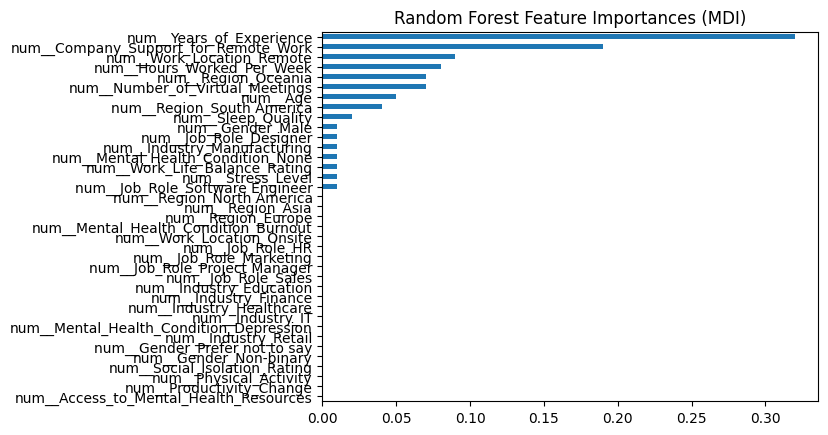

In [41]:
mdi_importances = pd.Series(rf.feature_importances_,
                            index=feature_names).sort_values(ascending=True)

# Plot the importances
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
plt.show()

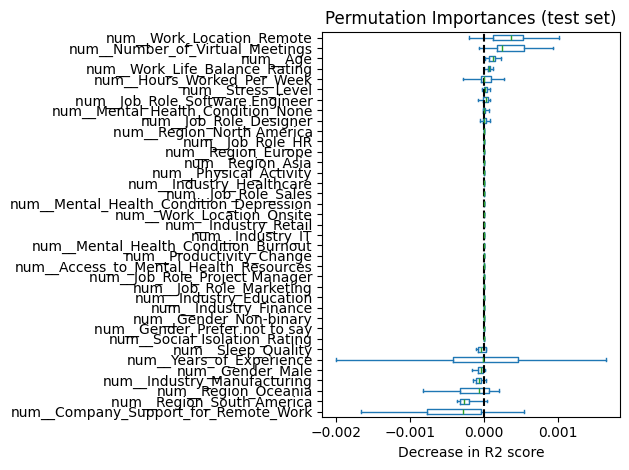

In [42]:
from sklearn.inspection import permutation_importance

# Transform the validation set
X_val_transformed = preprocessor.transform(x_val)

# Create a DataFrame from the transformed validation data
# Get feature names from the preprocessor if it has a feature names attribute
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # Provide custom names if preprocessor lacks `get_feature_names_out`
    feature_names = [f"feature_{i}" for i in range(X_val_transformed.shape[1])]

X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

# Compute permutation feature importance using the test data
result = permutation_importance(
    rf, X_val_transformed, y_val, n_repeats=10, random_state=42, n_jobs=2
)

# Sort importances and prepare a DataFrame for plotting
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_val_transformed_df.columns[sorted_importances_idx],
)

# Plot the permutation feature importance
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")

plt.tight_layout()
plt.show()

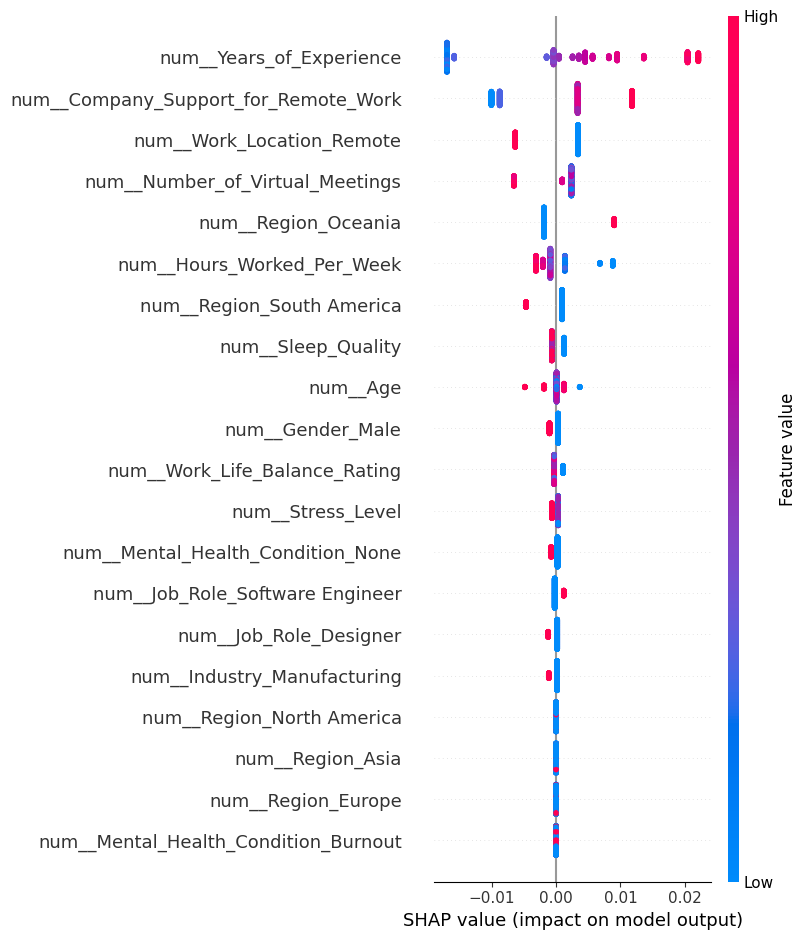

In [43]:
# Plot the SHAP feature importance
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val_transformed_df)
shap.summary_plot(shap_values, X_val_transformed_df)

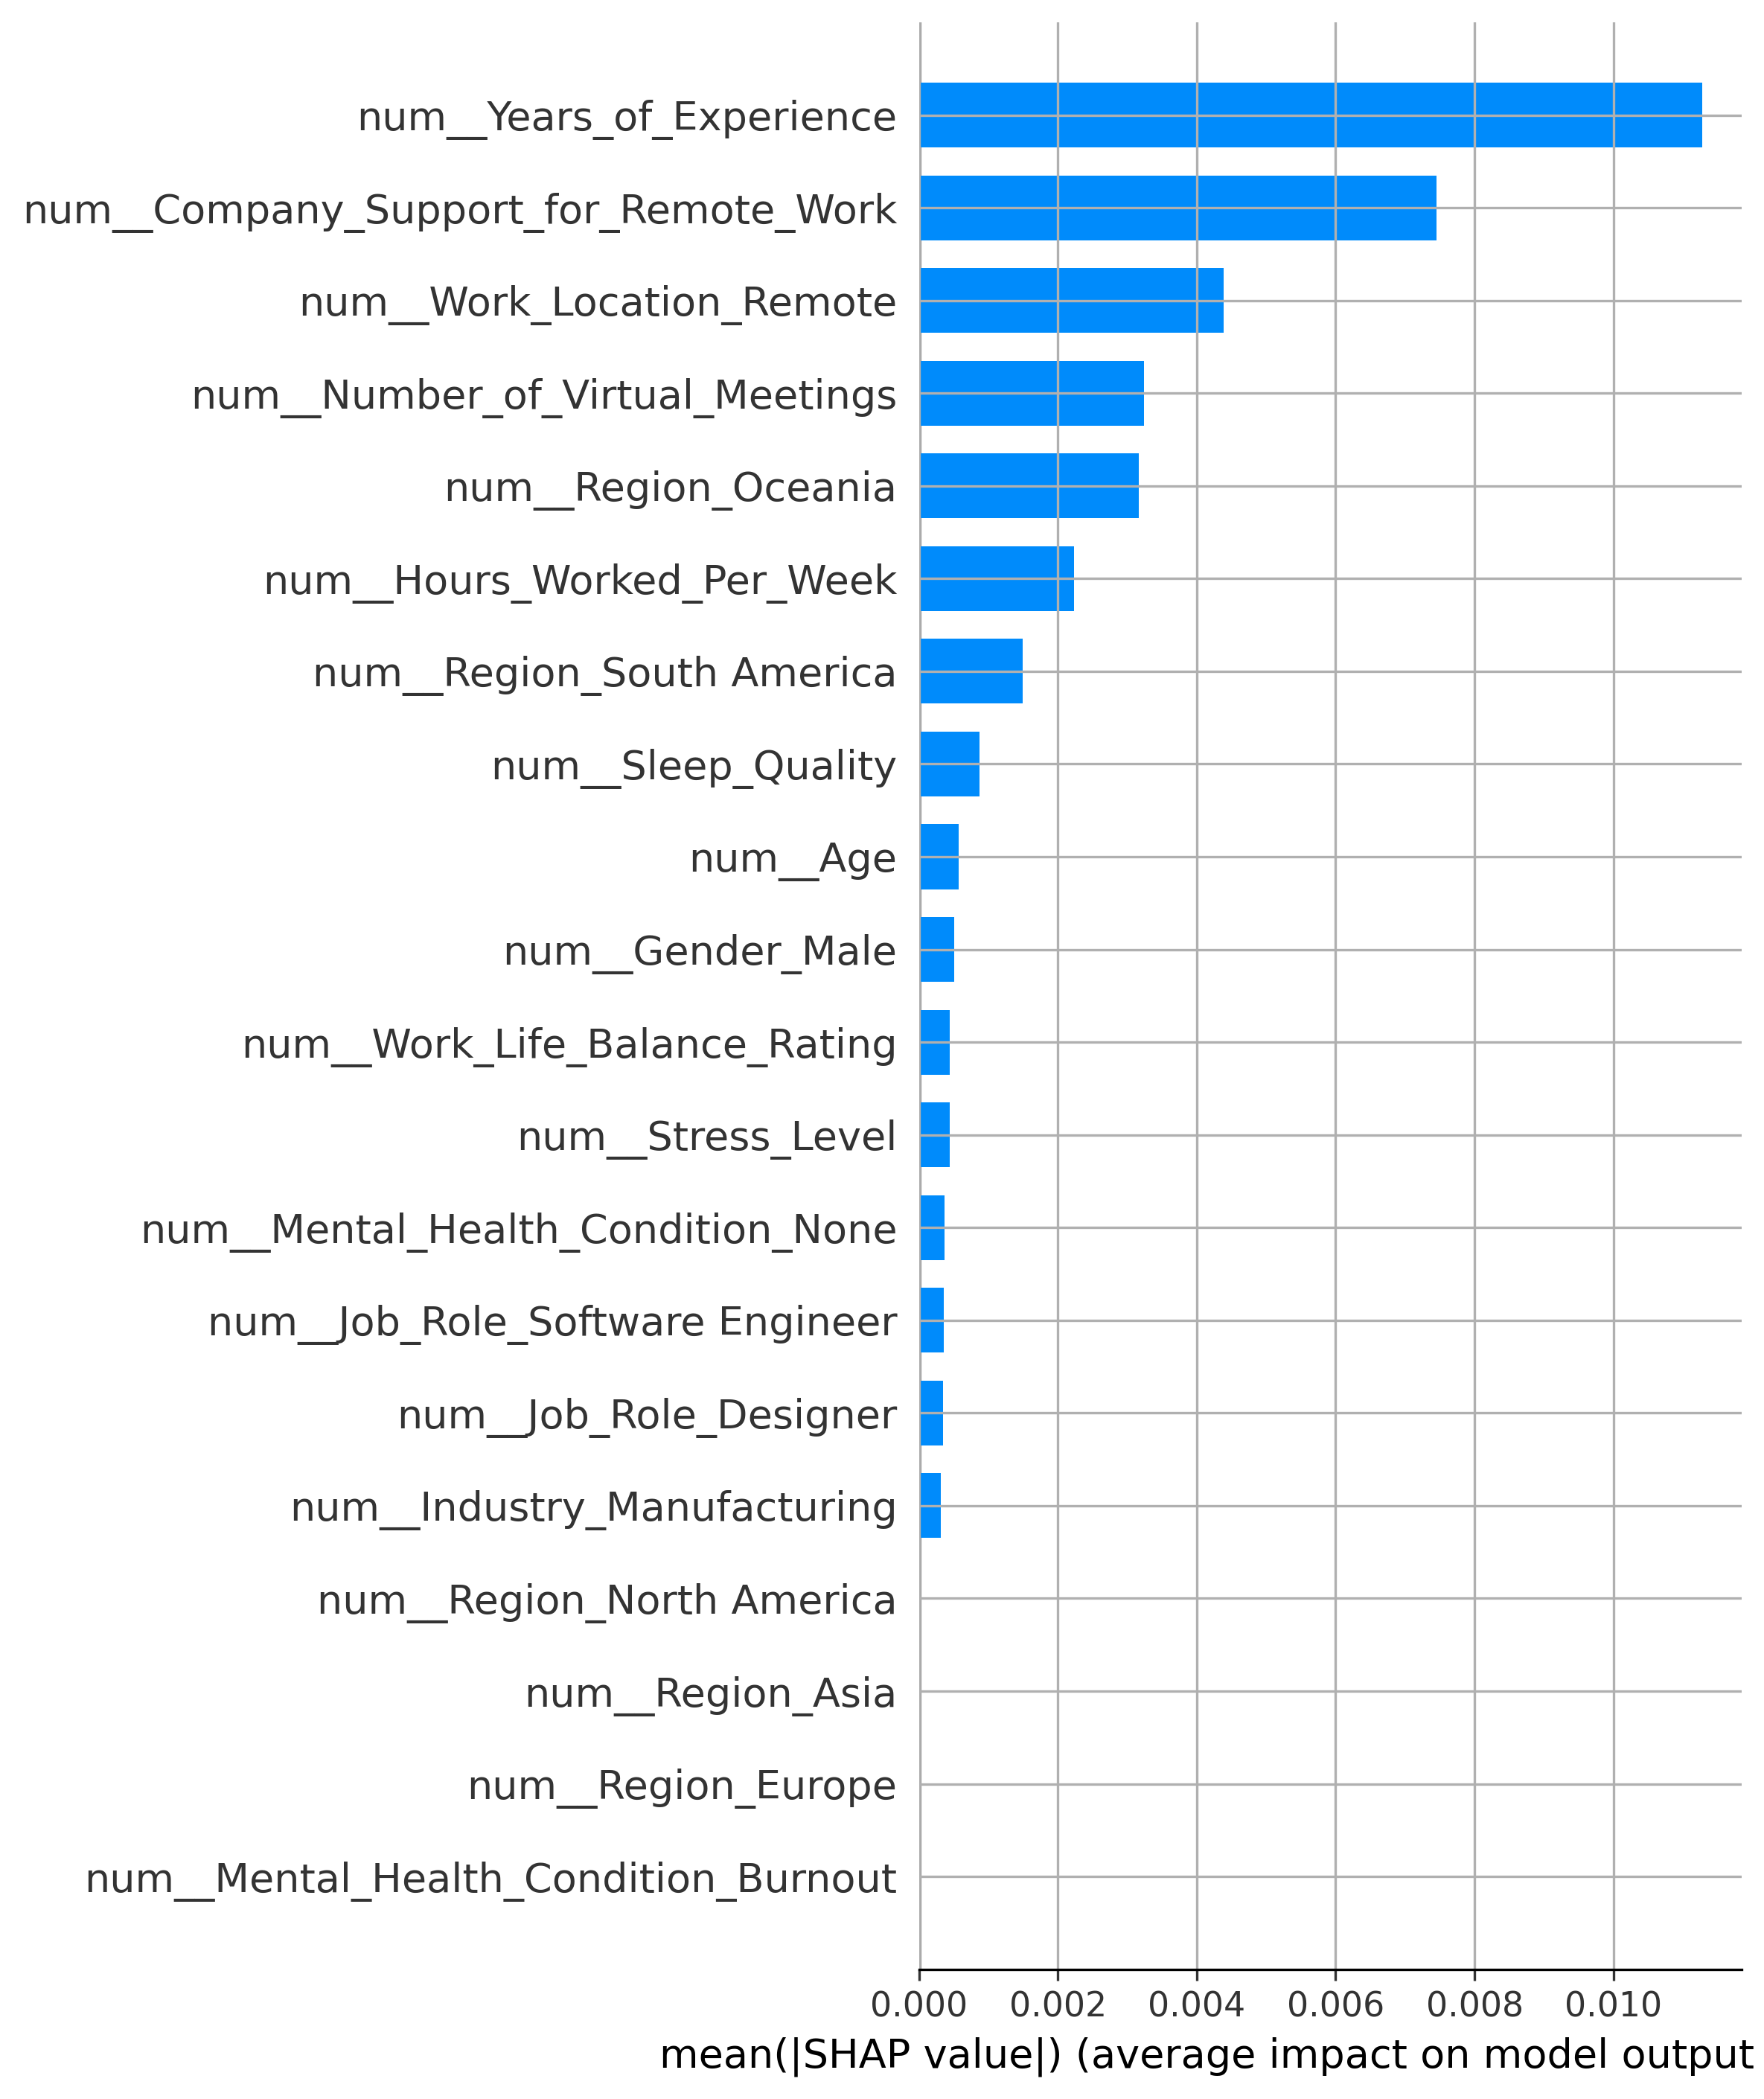

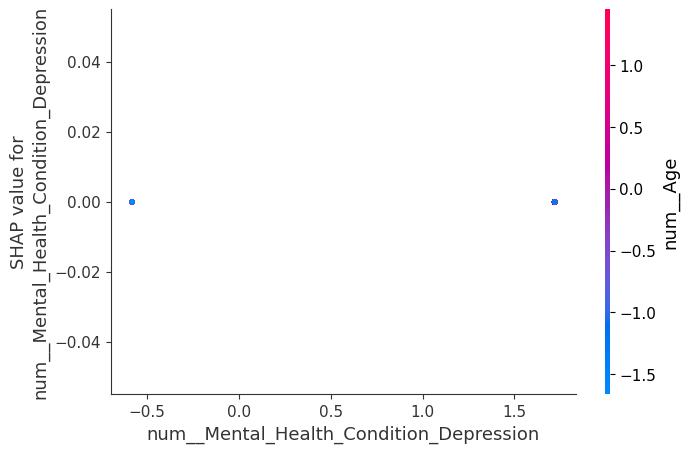

In [44]:
fig = plt.figure(figsize=(6, 3.3), dpi=300)
shap.summary_plot(shap_values, X_val_transformed_df,
                  plot_type="bar", show=False)
plt.grid()
shap.dependence_plot("num__Mental_Health_Condition_Depression", shap_values, X_val_transformed_df)

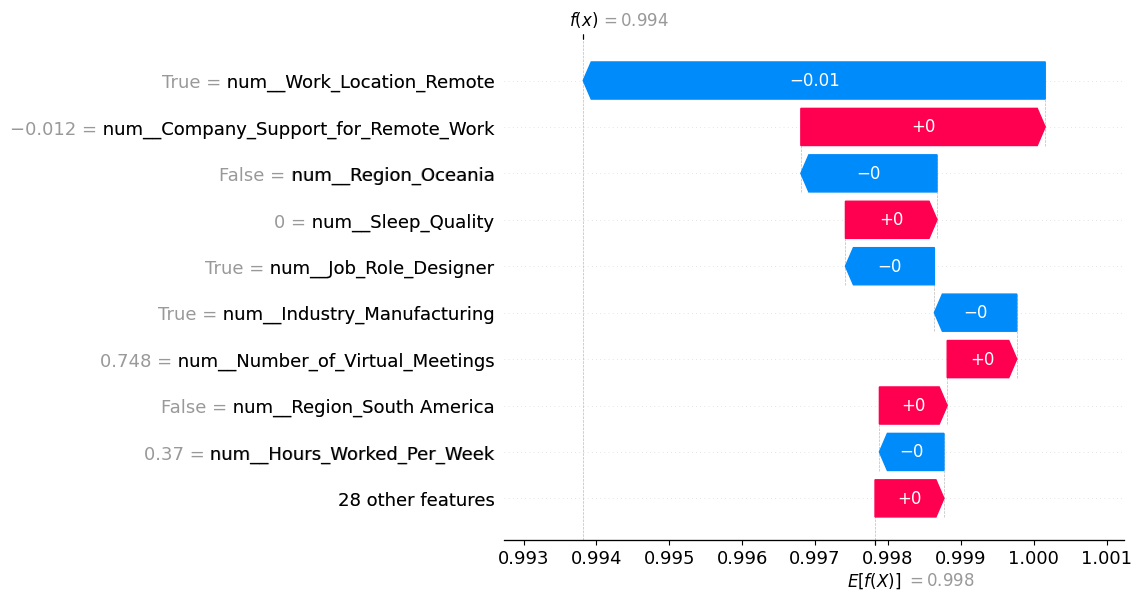

In [45]:
fig = plt.figure(figsize=(6, 3.3))
explanation5 = shap.Explanation(values=shap_values[4], base_values=explainer.expected_value[0],
                                feature_names=X_val_transformed_df.columns, data=x_val.iloc[4, :])
shap.plots.waterfall(explanation5)
fig.tight_layout()